In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Alexa3Reviews.csv")

In [3]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
df.head()

,title,text,rating,date
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019


## Distribuicao das Avaliacoes

Number of rows per star rating:
5    3475
4     818
3     304
1     233
2     150
Name: rating, dtype: int64


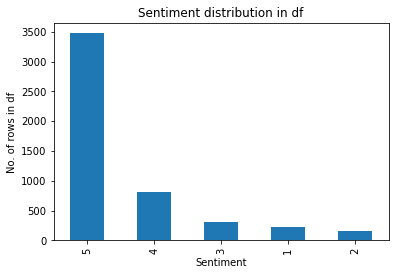

In [5]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(df['rating'].value_counts())

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['rating']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

## Tokenizacao

In [6]:
import spacy
from collections import Counter
from spacy.tokenizer import Tokenizer
from spacy.lang.pt import Portuguese

# É necessário instalar o pacote da lingua portuguesa no prompt do anaconda

nlp = Portuguese()
tokenizer = nlp.tokenizer
text_token = []

for line in df['text']: 
    tokens = tokenizer(line)
    text_token.append(list(tokens))
    
df["text_token"] = text_token

In [7]:
df.head()

,title,text,rating,date,text_token
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"[Sobre, o, produto, :, visual, muito, bonito, ..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"[O, dispositivo, possui, 4, microfones, direci..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"[Comprei, o, Alexa, Echo, Dot, (, terceira, ge..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"[Ainda, estou, me, adaptando, com, o, Echo, Do..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"[Acho, que, a, propaganda, desse, produto, est..."


## Stemming

In [8]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to C:\Users\Tuby
[nltk_data]     Neto\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [9]:
import spacy, nltk
import nltk
from nltk.stem.porter import *
from nltk.stem import RSLPStemmer


stemmer = RSLPStemmer()

stem_token_text = []

for doc in text_token:
    stem_list = []
    for tkn in doc:
        stem = stemmer.stem(str(tkn))
        stem_list.append(stem)
    stem_token_text.append(stem_list)
df['Stem_teken_text'] = stem_token_text

In [10]:
df.head()

,title,text,rating,date,text_token,Stem_teken_text
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"[Sobre, o, produto, :, visual, muito, bonito, ...","[sobr, o, produt, :, visual, muit, bonit, e, b..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"[O, dispositivo, possui, 4, microfones, direci...","[o, disposi, possu, 4, microfon, direc, do, to..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"[Comprei, o, Alexa, Echo, Dot, (, terceira, ge...","[compr, o, alex, ech, dot, (, terc, ger, ), as..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"[Ainda, estou, me, adaptando, com, o, Echo, Do...","[aind, est, me, adapt, com, o, ech, dot, ., fi..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"[Acho, que, a, propaganda, desse, produto, est...","[ach, que, a, propagand, dess, produt, est, se..."


## Bag Of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
for i in range(len(df["Stem_teken_text"])):
    df["Stem_teken_text"][i] = ", ".join([str(item) for item in df["Stem_teken_text"][i]])

df["Stem_teken_text"]

for i in range(len(df["text_token"])):
    df["text_token"][i] = ", ".join([str(item) for item in df["text_token"][i]])

df["text_token"]

<ipython-input-12-6ac7513d89a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Stem_teken_text"][i] = ", ".join([str(item) for item in df["Stem_teken_text"][i]])
<ipython-input-12-6ac7513d89a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_token"][i] = ", ".join([str(item) for item in df["text_token"][i]])


0       Sobre, o, produto, :, visual, muito, bonito, e...
1       O, dispositivo, possui, 4, microfones, direcio...
2       Comprei, o, Alexa, Echo, Dot, (, terceira, ger...
3       Ainda, estou, me, adaptando, com, o, Echo, Dot...
4       Acho, que, a, propaganda, desse, produto, está...
                              ...                        
4975    Quería, muito, uma, caixa, de, som, para, ouvi...
4976    Muito, bom, ,, melhor, ainda, do, que, eu, pen...
4977    O, que, mais, gostei, ,, é, a, qualidade, de, ...
4978    Muito, boa, ,, reconhece, muito, bem, a, voz, ...
4979    Ótimo, produto, ,, desperta, ,, acende, a, lâm...
Name: text_token, Length: 4980, dtype: object

In [13]:
df.head()

,title,text,rating,date,text_token,Stem_teken_text
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"Sobre, o, produto, :, visual, muito, bonito, e...","sobr, o, produt, :, visual, muit, bonit, e, be..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"O, dispositivo, possui, 4, microfones, direcio...","o, disposi, possu, 4, microfon, direc, do, top..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"Comprei, o, Alexa, Echo, Dot, (, terceira, ger...","compr, o, alex, ech, dot, (, terc, ger, ), ass..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"Ainda, estou, me, adaptando, com, o, Echo, Dot...","aind, est, me, adapt, com, o, ech, dot, ., fiz..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"Acho, que, a, propaganda, desse, produto, está...","ach, que, a, propagand, dess, produt, est, sen..."


 ## Consultando o Vocabulario

In [45]:
import collections
word_count = Counter()
for token in list(df['Stem_teken_text']): 
    word_count[token] += 1

word_count
vocabSize = len(word_count)

print("O tamanho do vocabulário é: ", vocabSize)

O tamanho do vocabulário é:  159


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = vocabSize
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['text_token'])

In [17]:
df["text_to_sequence"] = tokenizer.texts_to_sequences(df['text_token'])

## Padding

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100
padding_type = "post"
trunction_type="post"
text_to_sequence_padded = pad_sequences(df["text_to_sequence"], maxlen=max_length, padding=padding_type,
                       truncating=trunction_type)
df["text_to_sequence_padded"] = list(text_to_sequence_padded)

In [25]:
newRatings = []

for rating in df["rating"]:
    if rating==1 or rating==2 or rating==3:
        newRatings.append(0)
    else:
        newRatings.append(1)
        
df["rating"] = newRatings

In [40]:
df.head()

,title,text,rating,date,text_token,Stem_teken_text,text_to_sequence,text_to_sequence_padded,Embedded
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,1,9 de outubro de 2019,"Sobre, o, produto, :, visual, muito, bonito, e...","sobr, o, produt, :, visual, muit, bonit, e, be...","[162, 5, 27, 1328, 11, 487, 4, 26, 1592, 1714,...","[162, 5, 27, 1328, 11, 487, 4, 26, 1592, 1714,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,0,8 de outubro de 2019,"O, dispositivo, possui, 4, microfones, direcio...","o, disposi, possu, 4, microfon, direc, do, top...","[5, 104, 265, 227, 327, 4894, 14, 580, 617, 21...","[5, 104, 265, 227, 327, 4894, 14, 580, 617, 21...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,1,8 de outubro de 2019,"Comprei, o, Alexa, Echo, Dot, (, terceira, ger...","compr, o, alex, ech, dot, (, terc, ger, ), ass...","[59, 5, 17, 29, 41, 1198, 161, 176, 6, 272, 12...","[59, 5, 17, 29, 41, 1198, 161, 176, 6, 272, 12...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,1,13 de novembro de 2019,"Ainda, estou, me, adaptando, com, o, Echo, Dot...","aind, est, me, adapt, com, o, ech, dot, ., fiz...","[40, 48, 38, 1380, 10, 5, 29, 41, 311, 2, 358,...","[40, 48, 38, 1380, 10, 5, 29, 41, 311, 2, 358,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,0,23 de outubro de 2019,"Acho, que, a, propaganda, desse, produto, está...","ach, que, a, propagand, dess, produt, est, sen...","[155, 6, 2, 1288, 631, 27, 63, 200, 1017, 3, 2...","[155, 6, 2, 1288, 631, 27, 63, 200, 1017, 3, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## Clusterização dos Reviews

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(text_to_sequence_padded)

In [27]:
dist_cent = kmeans.transform(text_to_sequence_padded)

In [34]:
dist_cent1 = []
dist_cent2 = []

for item in dist_cent:
    dist_cent1.append(item[0])
    dist_cent2.append(item[1])
    

index_cent1 = dist_cent1.index(min(dist_cent1))
index_cent2 = dist_cent2.index(min(dist_cent2))
        
print(index_cent1)
print(index_cent2)

2378
1345


In [38]:
df.iloc[2378].text

'Muitas das vezes ela diz que não entende o que quero dizer, mesmo pedindo uma coisa muito simples.A parte de configurar rotinas é interessante.A integração com spotify não consegui fazer funcionar, então não tenho como pedir músicas pra ela.Precisa melhorar muito ainda.'

In [39]:
df.iloc[1345].text

'A Echo Dot é ótima pra quem busca uma “facilidade” no seu dia-a-dia, como por exemplo ligar a luz do quarto, claro se você tiver a lâmpada inteligente ou então usa-la para saber clima, despertador ou para ouvir música. Recomendo bastante, ainda mais se tiver com um preço bem interessante.'